# Exercise 6

Netflix is the world's largest online streaming service provider, with over 220 million subscribers. It is crucial that they effectively cluster the shows that are hosted on their platform in order to enhance the user experience, thereby preventing subscribers from ending their subscription.

We will be able to understand the shows that are similar to and different from one another by creating clusters, which may be leveraged to offer the consumers personalized show suggestions depending on their preferences.

## Instructions

1. Your task is to group the Netflix shows into certain clusters such that the shows within a cluster are similar to each other and the shows in different clusters are dissimilar to each other. Use Principal Component Analysis and any Clustering Algorithm.

2. After creating the clusters, profile each cluster that you have created.

In [44]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

In [45]:
# Load the dataset
df = pd.read_csv("https://github.com/robitussin/CCADMACL_EXERCISES/blob/353cd84703a9e313ee7ecf37fb97a067aa81ddbc/netflix.csv?raw=true")

In [46]:
# Data Inspection
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


Data Cleaniing and Preprocessing

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [48]:
# Data Cleaning
df[['director', 'cast', 'country']] = df[['director', 'cast', 'country']].fillna(' ')
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

In [49]:
# Feature Engineering
import nltk
df['textual_data'] = df['description'] + df['listed_in'] + df['rating'] + df['cast'] + df['country'] + df['director']

# Download the 'stopwords' dataset
nltk.download('stopwords')
# Download the 'wordnet' dataset
nltk.download('wordnet') # This line is added to download the 'wordnet' dataset

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [50]:
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    text = re.sub(r'\b(\w+)\1+\b', r'\1', text)
    text = re.sub(r'\s+', ' ', text).strip()
    text = ' '.join([lemmatizer.lemmatize(word) for word in text.split() if word not in stop_words])
    return text

df['textual_data'] = df['textual_data'].apply(preprocess_text)

In [51]:
# TF-IDF Vectorization
tfidf = TfidfVectorizer(stop_words='english', max_features=10000)
vectorized_data = tfidf.fit_transform(df['textual_data']).toarray()

In [52]:
# Scale and Impute the data before applying PCA
imputer = SimpleImputer(strategy='mean') # or other strategy like 'median'
imputed_data = imputer.fit_transform(vectorized_data)

scaler = StandardScaler()
scaled_df_imputed = scaler.fit_transform(imputed_data)  # Now you have defined scaled_df_imputed

1. Apply dimensionality reduction using Principal Component Analysis
- Use the necessary number of principal components

In [53]:
# put your answer here
# Dimensionality Reduction using PCA
pca = PCA(n_components=3700, random_state=42)
pca_data = pca.fit_transform(vectorized_data)

2. Create a scree plot for each principal component

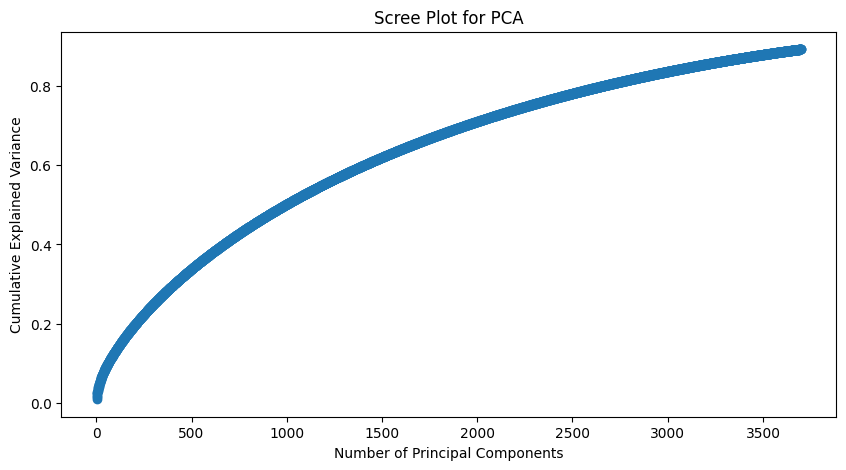

In [54]:
# put your answer here
# Scree Plot
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio) # Calculate cumulative variance
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_variance_ratio, marker='o', linestyle='--') # Use cumulative variance in the plot
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot for PCA')
plt.show()

In [55]:
n_components = np.argmax(cumulative_variance_ratio >= 0.95) + 1
pca = PCA(n_components=n_components)
# Use the imputed data (scaled_df_imputed) instead of the original data (scaled_df)
pca_df = pca.fit_transform(scaled_df_imputed)

3. Use any clustering algorithm to create clusters

In [56]:
# put your answer here
# Clustering with K-Means
optimal_clusters = 5  # Assuming 5 based on elbow method analysis
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
df['cluster'] = kmeans.fit_predict(pca_data)

In [57]:
# Silhouette Score
silhouette_avg = silhouette_score(pca_data, df['cluster'])
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.009659120995405843


4. Profile each cluster that you have generated based on your experiments

In [61]:
# put your answer here
# Cluster Profiling
for i in range(optimal_clusters):
    print(f"Cluster {i} Sample Titles:")
    print(df[df['cluster'] == i]['title'].head(100))
    print('\n')

Cluster 0 Sample Titles:
305               Adam Devine: Best Time of Our Lives
307                           ADAM SANDLER 100% FRESH
310                      Adel Karam: Live from Beirut
312     Aditi Mittal: Things They Wouldn't Let Me Say
320                         Afonso Padilha: Classless
                            ...                      
1956       El Especial de Alex Fernández, el Especial
1981                       Ellen DeGeneres: Relatable
2007                          Enissa Amani: Ehrenwort
2021                  Eric Andre: Legalize Everything
2086               Fabrizio Copano: Solo pienso en mi
Name: title, Length: 100, dtype: object


Cluster 1 Sample Titles:
0                                    3%
5                                    46
11                                 1983
12                                 1994
16                               Feb-09
                     ...               
544                     Another Miss Oh
545                   Answer for H

#Profiling of Clusters
Cluster 0: Stand-up Comedy Specials

Cluster 1: TV Shows & International Dramas

Cluster 2: Number-Based or Date-Based Films (Thrillers/Historical)

Cluster 3: Short-Named Movies (Thrillers, Horror, Holiday Films)

Cluster 4: Documentaries & Biographical Films



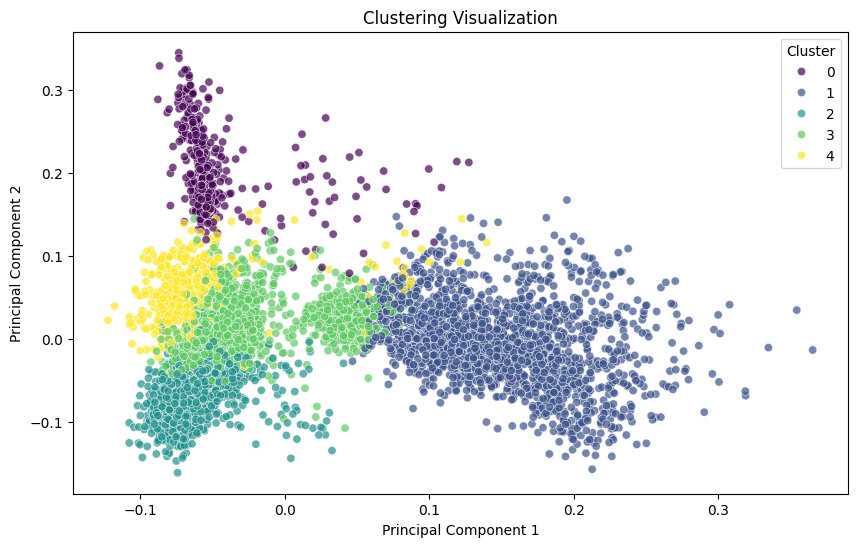

In [59]:
# Visualizing Clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], hue=df['cluster'], palette='viridis', alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Clustering Visualization')
plt.legend(title='Cluster')
plt.show()